# Bank Marketing Dataset

## Overview

The *bank marketing dataset* is available at the University of California, Irvine(UCI) machine learning repository. 

The data describes a problem in which a bank is interested in predicting which customers may respond to their direct marketing campaign to open a TERM DEPOSIT with the bank. The response variable Y=1 implies that the customer opens a term deposit after the campaign and Y=0 otherwise.the marketing campaign is based on the phone calls.

## Dataset Attributes

  **Variables:**
* **age**               : Age of the client
* **job**               : type of job(categories:'admin.','bluecollar','entrepreneur','housemaid','management','retired','self-                           employed','services','student','technician','unemployed','unknown')
* **martial**           : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced                           or widowed)
* **education**         : education qualification(categories: 'unknown','secondary','primary','tertiary')
* **default**           : customer has credit in default?(categories: 'no','yes')
* **balance**           : average yearly balance, in euros
* **housing-loan**      : has housing loan?(categories: 'no','yes')
* **personal-loan**     : has personal loan?(categories: 'no','yes')
* **previous-campaign** : number of contacts performed before this campaign and for this client
* **subscibed**         : has the client subscribed a term deposit?(binary: 'yes','no')

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading  the Dataset

In [2]:
# Importing the dataset
import pandas as pd
bank_df = pd.read_csv('bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


## Exploring the Data

In [3]:
# head
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [4]:
# tail
bank_df.tail()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,2,7,no


In [5]:
# structure of the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [6]:
# summary statistics of the dataset for integer variables
bank_df.describe()

,age,balance,current-campaign,previous-campaign
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630,0.542579
std,10.576211,3009.638142,3.109807,1.693562
min,19.000000,-3313.000000,1.000000,0.000000
25%,33.000000,69.000000,1.000000,0.000000
50%,39.000000,444.000000,2.000000,0.000000
75%,49.000000,1480.000000,3.000000,0.000000
max,87.000000,71188.000000,50.000000,25.000000


In [7]:
# Dimensions of the dataset
bank_df.shape

(4521, 11)

*The dataset has a total of 4521 observations and 11 features.*

In [8]:
# Customers who have subscribed and not subscribed to the term deposit
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

*The dataset has a total of 4521 observations, out of which 521 customers subscribed the term deposit and the remaining 4000 did not subscribe the term deposit. Except age, balance, current-campaign, and previous-campaign, rest all are (object) categorical features.*

## Missing Values

In [9]:
# Checking the null values in all the rows
bank_df.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing-loan         0
personal-loan        0
current-campaign     0
previous-campaign    0
subscribed           0
dtype: int64

*There are no rows with the null values in our dataset.*

## Exploratory Data Analysis

### 'subscribed' vs 'not-subscribed'

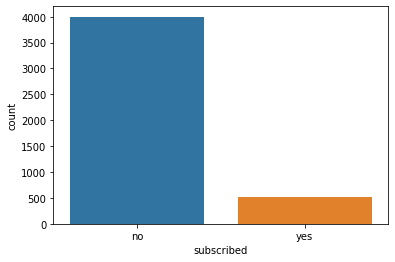

In [10]:
sns.countplot(x='subscribed',data=bank_df)

*The dataset is quite imbalanced. Both the classes are not equally represented.*

### 'subscribed' vs 'housing-loan'

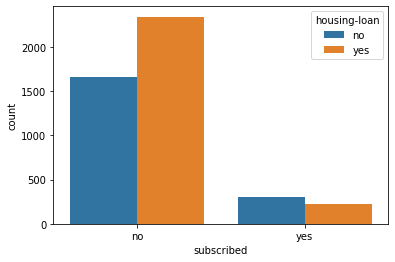

In [11]:
sns.countplot(x='subscribed',hue='housing-loan',data=bank_df)

*There are more customers who have already subscribed term deposit of the bank but has not taken housing loan, so bank can target these customers by offering housing loan to them.*

*Whereas in case of those customers who have already taken housing loan from the bank but not subscribed to term deposit scheme of the bank. In this case bank can offer term deposit scheme to those customers who have taken housing loan from bank.*

### 'subscribed' vs 'personal-loan'

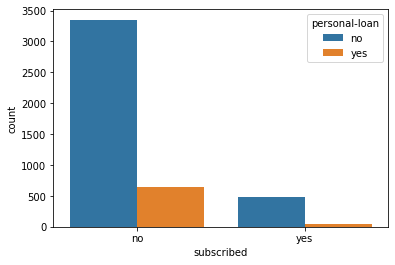

In [12]:
sns.countplot(x='subscribed',hue='personal-loan',data=bank_df)

*There are more customers who have already subscribed term deposit of the bank but has not taken personal loan, so bank can target these customers by offering them personal-loan.*

*Whereas in case of those customers who have already taken personal loan from the bank but has not subscribed to term deposit scheme of the bank. The bank can offer term deposit scheme to these customers who have taken personal-loan from bank.*


In [13]:
# Filtering out the subscibed only
filter1 = bank_df["subscribed"]=="yes"
    
# filtering data on basis of both filters 
df_subscribed = bank_df.where(filter1).dropna()

# Subscribed dataframe head
df_subscribed.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
13,20.0,student,single,secondary,no,502.0,no,no,1.0,0.0,yes
30,68.0,retired,divorced,secondary,no,4189.0,no,no,2.0,0.0,yes
33,32.0,management,single,tertiary,no,2536.0,yes,no,6.0,0.0,yes
34,49.0,technician,married,tertiary,no,1235.0,no,no,3.0,0.0,yes
36,78.0,retired,divorced,primary,no,229.0,no,no,1.0,0.0,yes


### 'subscribed' vs 'education'

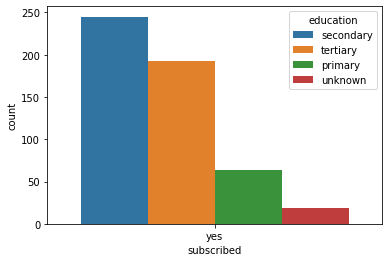

In [14]:
sns.countplot(x='subscribed', hue='education',data=df_subscribed)

*It seems that people who have **secondary education** have mostly subscribed to term deposit scheme where as **unknown** and **primary education** holder have comparatively very low in subscribing term deposit scheme.*

### 'subscribed' vs 'marital status'

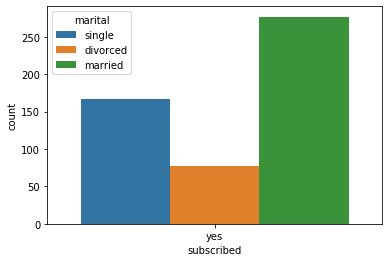

In [15]:
sns.countplot(x='subscribed',hue='marital',data=df_subscribed)

### 'Age'

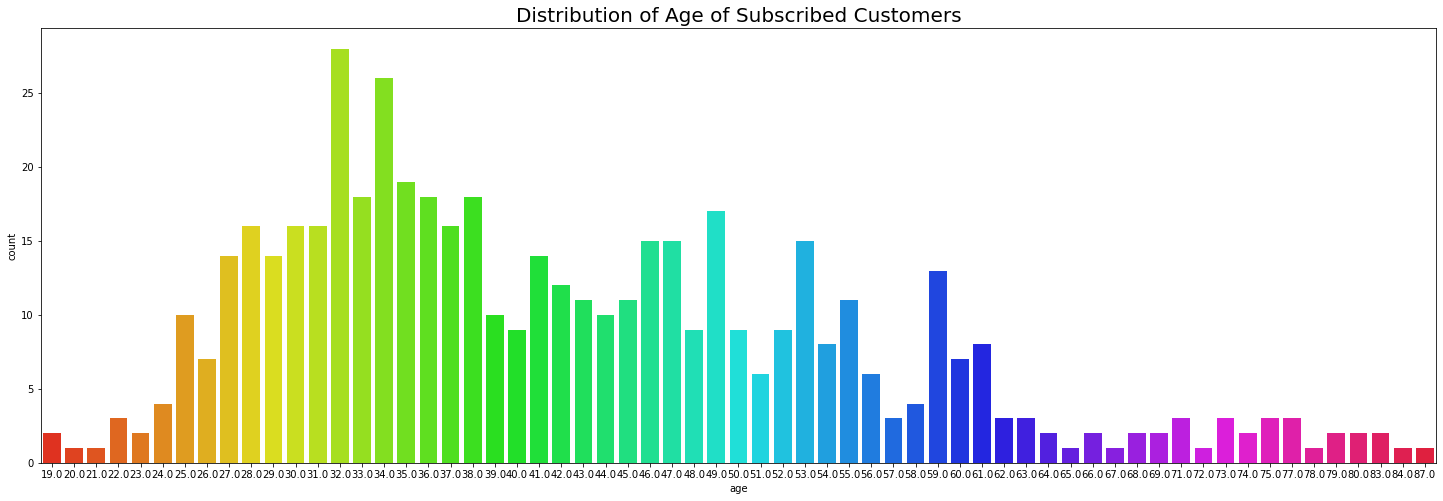

In [16]:
plt.figure(figsize = (25, 8))
sns.countplot(df_subscribed['age'], palette = 'hsv')
plt.title('Distribution of Age of Subscribed Customers', fontsize = 20)
plt.show()

*From the above plot it is evident that people who have already subscribed to term deposit scheme of bank are mostly in the age range of 25 years to 40 years.*

###  'Balance'

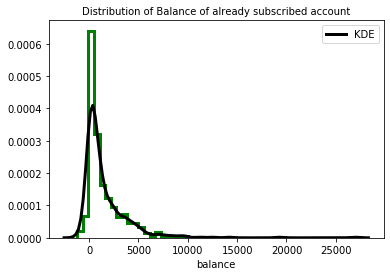

In [17]:
sns.distplot(df_subscribed['balance'], hist=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"}, kde=True,bins=50,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
plt.title('Distribution of Balance of already subscribed account', fontsize = 10)
plt.show()

*Most of the customers who have already subscribed to term deposit scheme of bank has a average yearly balance between 0 to 5000 euros.*

###  'Default Loan Status'

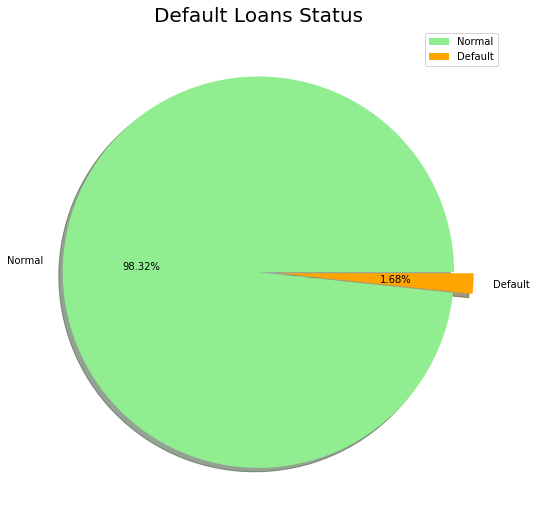

In [18]:
labels = ['Normal', 'Default']
size = bank_df['default'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.figure(figsize = (9, 9))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Default Loans Status', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

*From the above pie plot, we can say that there are very less customers who has credit in **default** compared to **non-defaulters**.*

### 'Status of Housing Loan'

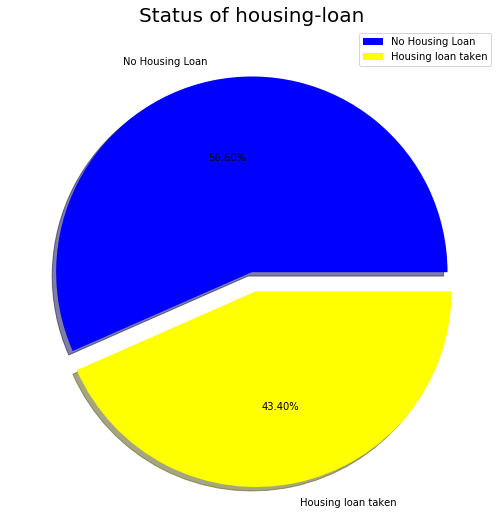

In [19]:
labels = ['No Housing Loan','Housing loan taken' ]
size = bank_df['housing-loan'].value_counts()
colors = ['blue', 'yellow']
explode = [0, 0.1]

plt.figure(figsize = (9, 9))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of housing-loan', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

*From the above pie plot, We can clearly say that we have more number of customers with no **housing-loan** compared to those who has **housing-loan**. The bank can target these customers who have taken the housing loan to take the **term-deposit** scheme as well.*

### 'Status of personal-loan customer'

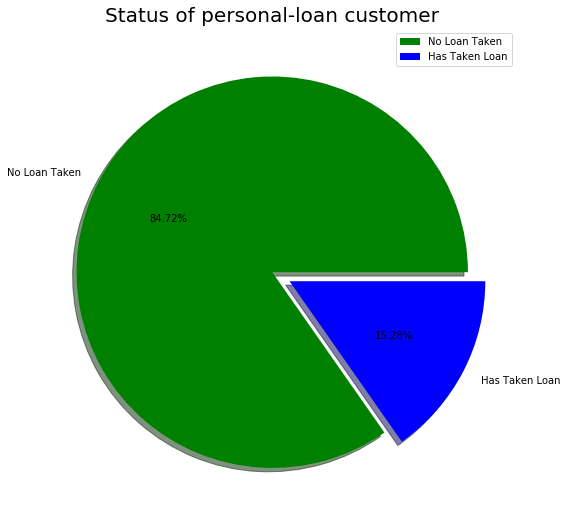

In [20]:
labels = ['No Loan Taken','Has Taken Loan']
size = bank_df['personal-loan'].value_counts()
colors = ['green', 'blue']
explode = [0, 0.1]

plt.figure(figsize = (9, 9))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of personal-loan customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

*From the above pie plot, We can say that we have very less number of customers with the **personal-loans** taken. So, We can target them to take the **term-deposit** scheme as well.*

### 'Status of subscribed customer'

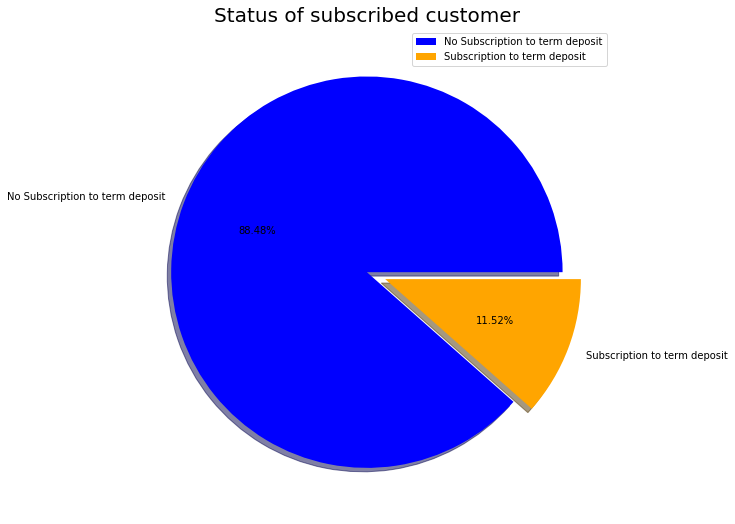

In [21]:
labels = ['No Subscription to term deposit','Subscription to term deposit']
size = bank_df['subscribed'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of subscribed customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

*From the above pie plot, We can say that the classes are not equally represented. There are only 11.5% observations in which customers have **subscription** as opposed to 88.48% where customers have **no subscription**.*

###  'Housing vs Balance vs Default'

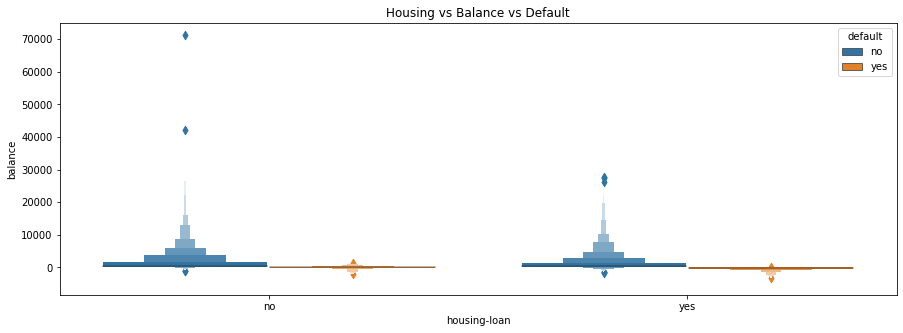

In [22]:
plt.figure (figsize = (15, 5))
sns.boxenplot(bank_df['housing-loan'], bank_df['balance'], hue=bank_df['default'])
plt.title('Housing vs Balance vs Default', fontsize = 12)
plt.show()

### 'Personal Loan vs Balance vs Default'

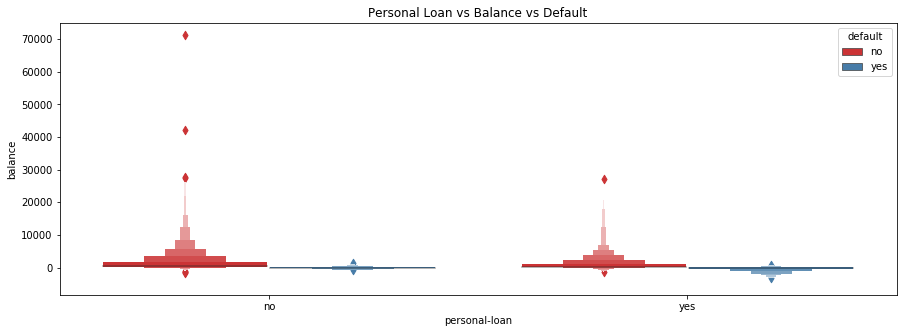

In [23]:
plt.figure(figsize = (15, 5))
sns.boxenplot(bank_df['personal-loan'], bank_df['balance'], hue=bank_df['default'], palette="Set1")
plt.title('Personal Loan vs Balance vs Default', fontsize = 12)
plt.show()

*From the above plots, it is evident that the customers who have defaulted have very less balance in account with the bank. This is quite useful pattern in keeping tap on such type of defaulters.*

*All the variables are having low correlations among each other. So, we don't see much multi-collinearity issue.*

## Preparing the Dataset

**The dataset is quite imbalanced. Both the classes are not equally represented. One approach to deal with imbalanced data is bootstrapping. It involves resampling techniques such as *upsampling* and *downsampling*.**

***sklearn.utils* has resample method to help with upsampling.**

In [24]:
# Importing resample from sklearn.utils package
from sklearn.utils import resample

# Seperate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

# Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes, replace = True, n_samples = 2000)

# Combine majority class with upsampled minority class 
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [25]:
# new_bank_df with subscription and no subscription
new_bank_df.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

*After upsampling, the *new_bank_df* contains 4000 cases of *subscribed = no* and 2000 cases of *subscribed = yes*.

In [26]:
# shuffling the new dataframe 
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

Assigning all the feature column names to *X_features* variable

In [27]:
# Assigning list of all the features column names in the DataFrame
X_features = list(new_bank_df.columns)
# Remove the response variable from the list
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

### Encoding all the Categorical Features

In [28]:
# Encoding the categorical variables using new_bank_df independent variables 
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first = True)
X = encoded_bank_df

The **subscribed** column values are string literals and need to be encoded as follows :
1. *yes* to 1
2. *no*  to 0

In [29]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map(lambda x: int(x == 'yes'))

## Splitting the Dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

## Model Building

### Logistic Regression

### Training the model

In [32]:
from sklearn.linear_model import LogisticRegression
# Intializing the model
logit = LogisticRegression()
# Fitting the model with X and Y values of the dataset
logit.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predictions and Evaluation on Test Data

In [33]:
# predictions 
pred_y = logit.predict(test_X)
# confusion matrix
from sklearn import metrics
# classes with label 1(subscribed) as row 1 and 0(not-subscribed) as row 2
cm = metrics.confusion_matrix(test_y, pred_y,[1,0])
print(cm)

[[ 133  462]
 [  61 1144]]


*The model has very few true positives and a large nuber of False negatives.*

In [34]:
# classification report
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1205
           1       0.69      0.22      0.34       595

   micro avg       0.71      0.71      0.71      1800
   macro avg       0.70      0.59      0.58      1800
weighted avg       0.70      0.71      0.66      1800



In [35]:
# Accuracy
acc = metrics.accuracy_score(test_y,pred_y)
acc

0.7094444444444444

*Recall for positive cases is only 0.26. Most of the cases have been predicted as negative.*

### Reciever Operating Characterisitc Curve(ROC) and Area under ROC(AUC) Score

**The method takes the following three parameters**:
* the classification model
* test_X : X features of the test set
* test_y : actual labels of the test set

**Returns:**
* ROC AUC Score
* FPR and TPRs for different threshold values

In [36]:
def draw_roc_curve(model, test_X, test_y):
    # Creating and Initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame({'actual': test_y})
    test_results_df = test_results_df.reset_index()
    
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame(model.predict_proba(test_X))
    
    # selecting the probabilities that the test observation belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    
    # Invoke roc_curve() to return fpr, tpr and threshold values
    # Threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual,
                                            test_results_df.chd_1,
                                            drop_intermediate = 
                                            False)
    
    # Getting roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
    
    # Setting the size of the plot
    plt.figure(figsize = (8,6))
    # Plotting the actual fpr and tpr values
    plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    # Plotting the diagonal line from (0,1)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.5])
    # Setting the labels and titles
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characteristic ')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc_score,fpr,tpr, thresholds

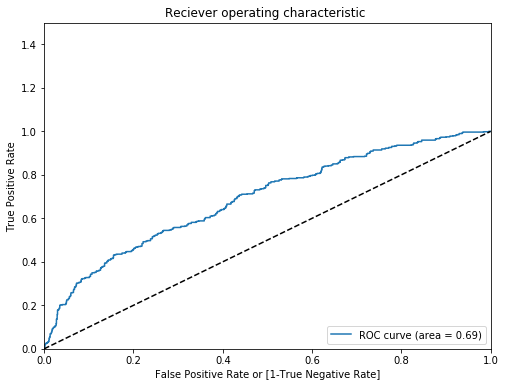

In [37]:
# Invoking the draw_roc_curve with logistic regression model
_, _, _, _ = draw_roc_curve( logit, test_X, test_y ) 

In [38]:
accuracies = {}
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 0.71%


### KNN Algorithm

In [39]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

# Initializing the classifier
knn_clf = KNeighborsClassifier()

# Fitting the model with the training set
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

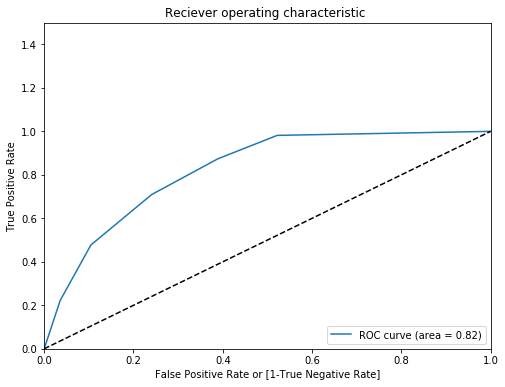

In [40]:
# Invoking the draw_roc_curve with KNN model
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y ) 

*KNN has AUC score of 0.80 and is better than the Logistic Regression Model.*

### Predictions and Evaluations on Test Data

In [41]:
# Predicting on test set
pred_y = knn_clf.predict(test_X)
# Drawing the confusion matrix for KNN model
cm = metrics.confusion_matrix(test_y,pred_y,[1,0])
print(cm)

[[422 173]
 [290 915]]


In [42]:
# Accuracy
metrics.accuracy_score(test_y,pred_y)

0.7427777777777778

In [43]:
# Classification report
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1205
           1       0.59      0.71      0.65       595

   micro avg       0.74      0.74      0.74      1800
   macro avg       0.72      0.73      0.72      1800
weighted avg       0.76      0.74      0.75      1800



*Recall of the true positive cases has improved from 0.26(Logistic Regression model) to 0.65(KNN model).*

### GridSearch for Optimal Parameters

In [44]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10), 'metric': ['canberra','euclidean','minkowski']}]

# Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                  tuned_parameters,
                  cv=10,
                  scoring = 'roc_auc')

# fit the search with training set
clf.fit(train_X,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': range(5, 10), 'metric': ['canberra', 'euclidean', 'minkowski']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [45]:
clf.best_score_

0.8288205327410458

In [46]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

### Building the Final KNN Model with Optimal Parameters

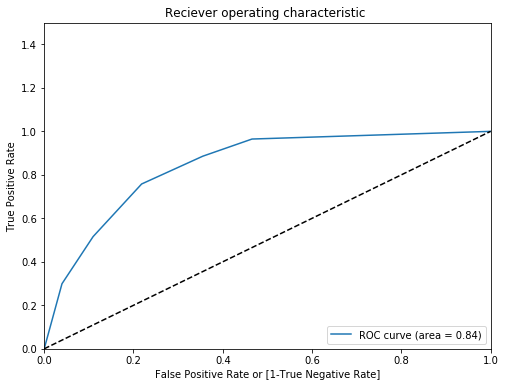

In [47]:
_, _, _, _ = draw_roc_curve( clf, test_X, test_y ) 

*The roc_auc score is 0.84, which is slightly higher than minowski distance.*

In [48]:
# Predicting on test set
pred_y_final = clf.predict(test_X)
# Drawing the confusion matrix for KNN model
cm = metrics.confusion_matrix(test_y,pred_y_final,[1,0])
print(cm)

[[451 144]
 [263 942]]


In [49]:
# Accuracy
acc = metrics.accuracy_score(test_y,pred_y_final)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Maximum KNN Score is 0.77%


In [50]:
# Classification report
print(metrics.classification_report(test_y,pred_y_final))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1205
           1       0.63      0.76      0.69       595

   micro avg       0.77      0.77      0.77      1800
   macro avg       0.75      0.77      0.76      1800
weighted avg       0.79      0.77      0.78      1800



*Recall of the true positive cases has improved from 0.65 (KNN model with minkowski distance ) to 0.70(KNN model with canberra distance).*

### Random Forest Algorithm

In [51]:
# Importing the Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

#Intializing the Random Forest Classifier with max_depth and n_estimators
radm_clf = RandomForestClassifier(max_depth = 10, n_estimators = 10)
radm_clf.fit( train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

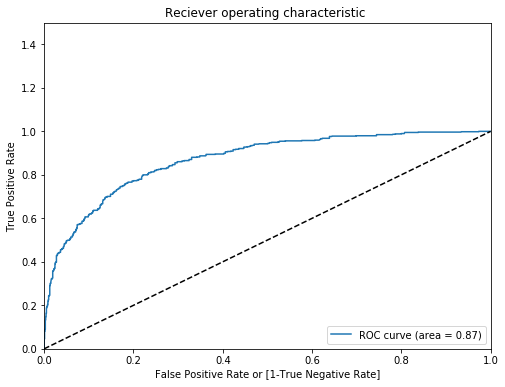

In [52]:
_, _, _, _ = draw_roc_curve( radm_clf, test_X, test_y ) 

*AUC for the random forest model is 0.86 and better compared to KNN Model.*

### Grid Search for Optimal Parameters

In [53]:
# Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10,15], 'n_estimators': [10,20],'max_features':['sqrt',0.2]}]

# Initializing the RF classifier
radm_clf = RandomForestClassifier()

# Configuring search with the tunable parameters 
clf = GridSearchCV(radm_clf,
                  tuned_parameters,
                  cv = 5,
                  scoring = 'roc_auc')

# Fitting the training set
clf.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [10, 15], 'n_estimators': [10, 20], 'max_features': ['sqrt', 0.2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [54]:
clf.best_score_

0.9359373308971919

In [55]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

*The best accuracy is given by random forest model with 20 decision trees(estimators), a maximum number of features as sqrt, and max depth as 15.*

### Building the Final Random Forest Model with Optimal Parameter Values

In [56]:
# Initializing the Random Forest Model with the optimal values
radm_clf = RandomForestClassifier(max_depth = 15,
                                 n_estimators = 20,
                                 max_features = 'sqrt')

# Fitting the model with the training set
radm_clf.fit( train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### ROC AUC Score

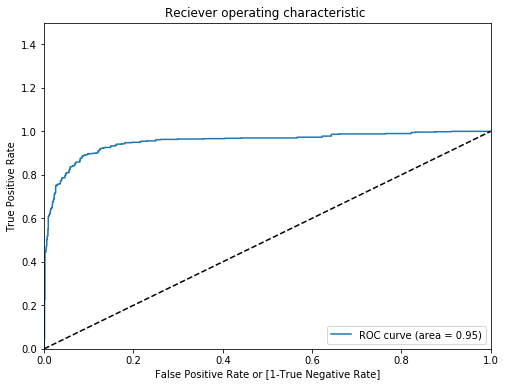

In [57]:
_, _, _, _ = draw_roc_curve(radm_clf,test_X,test_y)

*The AUC value for the random forest model is 0.94.*

### Predictions and Evaluation on Test Data

In [58]:
pred_y = radm_clf.predict( test_X )
cm = metrics.confusion_matrix( test_y, pred_y,[1,0])
print(cm)

[[ 482  113]
 [  64 1141]]


*The model can detect 481 out of 594 subscribed cases and there are only 70 false positive cases.*

In [59]:
# accuracy 
acc = metrics.accuracy_score(test_y, pred_y)
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 0.90%


In [60]:
# classification report
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1205
           1       0.88      0.81      0.84       595

   micro avg       0.90      0.90      0.90      1800
   macro avg       0.90      0.88      0.89      1800
weighted avg       0.90      0.90      0.90      1800



*The precision and recall for positive cases are 0.87 and 0.81, respectively, which are far better than what we obtained using logistic Regression and KNN Model.*

### Feature Importance 

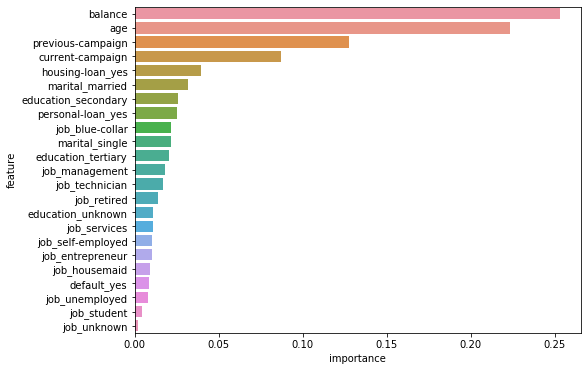

In [61]:
import numpy as np
# Dataframe to store the features and thier corresponding importance
feature_rank = pd.DataFrame({'feature': train_X.columns,
                            'importance': radm_clf.feature_importances_})

# Sorting the features based on their importances with most important features at top.
feature_rank = feature_rank.sort_values('importance',ascending = False)
plt.figure(figsize = (8,6))

# plot the values
sns.barplot(y = 'feature', x = 'importance', data = feature_rank)

*The top 5 features are balance,age,previous-campaign,current-campaign, and house-loan-yes.*

**The cumulative sum of features importance can show the amount of variance explained by the top five features.**

In [62]:
feature_rank['cumsum'] = feature_rank.importance.cumsum()*100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.252812,25.281223
0,age,0.223002,47.581469
3,previous-campaign,0.127382,60.319643
2,current-campaign,0.087182,69.037861
21,housing-loan_yes,0.039675,73.005328
15,marital_married,0.032041,76.209459
17,education_secondary,0.025545,78.763985
22,personal-loan_yes,0.025343,81.298264
4,job_blue-collar,0.021846,83.482833
16,marital_single,0.021539,85.636717


*The top 5 features provide 75% of the information in the data with respect to the outcome variable.*

## Boosting

**The two most widely used boosting algorithms are *AdaBoost* and *Gradient Boosting*.**

### AdaBoost

In [63]:
# Importing AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [64]:
# Initializing logistic Regression to use as base classifier
logreg_clf = LogisticRegression()

# Initializing Adaboost classifier with 50 classifiers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators= 50)


# Fitting AdaBoost model to training set
ada_clf.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

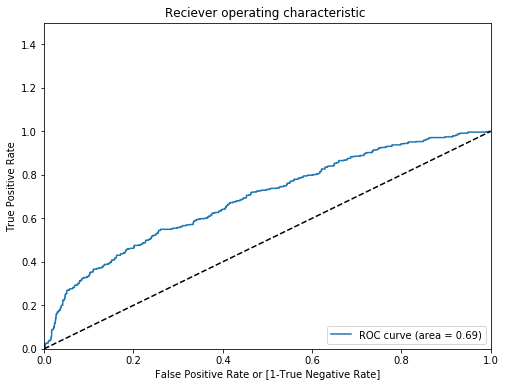

In [65]:
_, _, _, _ = draw_roc_curve(ada_clf, test_X, test_y)

*The AUC for the AdaBoost model is 0.67.*

In [66]:
# Predictions on test data
pred_y = ada_clf.predict(test_X)
# confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y,[1,0])
print(cm)

[[ 105  490]
 [  42 1163]]


In [67]:
# accuracy 
acc = metrics.accuracy_score(test_y, pred_y)
accuracies['Ada Boost'] = acc
print("Ada Boost Algorithm Accuracy Score : {:.2f}%".format(acc))

Ada Boost Algorithm Accuracy Score : 0.70%


In [68]:
# classification report
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      1205
           1       0.71      0.18      0.28       595

   micro avg       0.70      0.70      0.70      1800
   macro avg       0.71      0.57      0.55      1800
weighted avg       0.71      0.70      0.64      1800



### Gradient Boosting

**We will build a model with 500 estimators and *max_depth* value as 100.**

In [69]:
# Importing the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Intializing Gradient Boosting with 500 estimators and max_depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators = 500, max_depth = 10)

# Fitting gradient boosting model to training set
gboost_clf.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

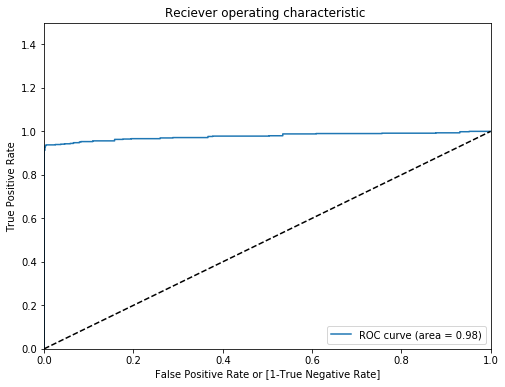

In [70]:
_, _, _, _ = draw_roc_curve(gboost_clf, test_X, test_y)

*The ROC curve of gradient boosting model shows an AUC score of 0.97.*

**Gradient Boosting model seems to be the best among all models we have built so far. We will run a 10-fold cross validation to check the model's accuracy**

In [71]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier( n_estimators= 500, max_depth= 10)

cv_scores = cross_val_score( gboost_clf, train_X, train_y, cv = 10, scoring = 'roc_auc')

In [72]:
print(cv_scores)
print('Mean_accuracy:',np.mean(cv_scores),'with standard deviation of:',np.std(cv_scores))

[0.96030902 0.97554458 0.96448835 0.9720618  0.96180344 0.97529442
 0.96154634 0.97585765 0.96507937 0.96907322]
Mean_accuracy: 0.9681058191979606 with standard deviation of: 0.0059115995936914615


*The model accuracy is consistent with a mean accuracy of 96.5% and a standard deviation of only 1%. This is a robust model.*

In [73]:
# fitting the model on train data
gboost_clf.fit(train_X, train_y)
# Predictions on test data
pred_y = gboost_clf.predict(test_X)
# confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y,[1,0])
print(cm)

[[ 563   32]
 [  63 1142]]


*The false negatives are only 33 and false positives are 70.*

In [74]:
# accuracy 
acc = metrics.accuracy_score(test_y, pred_y)
accuracies['Gradient Boosting'] = acc
print("Gradient Boosting Algorithm Accuracy Score : {:.2f}%".format(acc))

Gradient Boosting Algorithm Accuracy Score : 0.95%


In [75]:
# classification report
print( metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1205
           1       0.90      0.95      0.92       595

   micro avg       0.95      0.95      0.95      1800
   macro avg       0.94      0.95      0.94      1800
weighted avg       0.95      0.95      0.95      1800



*The model detects 561 out of 594 subscribed cases with recall reaching 94%.*

### Feature Importance

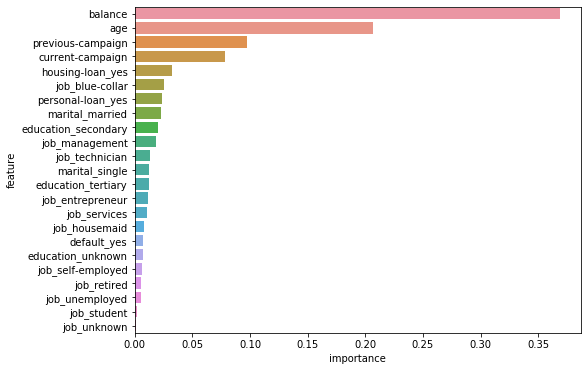

In [76]:
# Dataframe to store the features and their corresponding importances
feature_rank = pd.DataFrame({'feature': train_X.columns,
                            'importance': gboost_clf.feature_importances_})
# Sorting the features based on their importances with most important features at top
feature_rank = feature_rank.sort_values('importance',ascending = False)
plt.figure(figsize = (8,6))

# Plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank)


*Gradient Boosting model also selected the features balance,age and current_campaign as top features which have maximum information about whether a customer will subscribe or not subscribe to the term-deposits.*

### Comparing Models

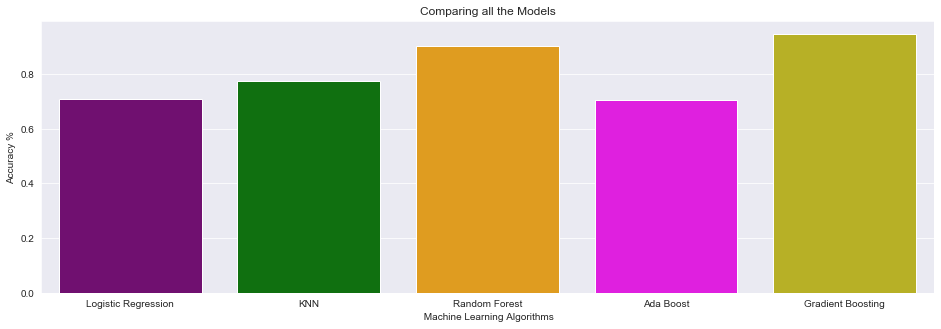

In [77]:
# Colors to each algorithm
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
# grid style
sns.set_style("darkgrid")
# figure size
plt.figure(figsize=(16,5))
# labels
plt.ylabel("Accuracy %")
plt.xlabel(" Machine Learning Algorithms")
plt.title('Comparing all the Models')
# bar plot
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

**Our models work fine but best of them are Gradient Boosting and Random Forest Models with High Model Performance.**